0   : 78.15+1.21  FedAvg-V1_M500_P10_K5_R4000_wvgg9k4_cifar10_exdir2,10.0_sgd0.1,1.0,0.0,0.0001_b20_seed1234_clip10.csv
1   : 67.73+0.06  FedAvg-V2_M500_P10_K5_R4000_wvgg9k4_cifar10_exdir2,10.0_sgd0.1,1.0,0.0,0.0001_b20_seed1234_clip10.csv
2   : 78.15+1.21  FedAvg-V3_M500_P10_K5_R4000_wvgg9k4_cifar10_exdir2,10.0_sgd0.1,1.0,0.0,0.0001_b20_seed1234_clip10.csv
localdatasetFedAvg-V1_K5_wvgg9k4_cifar10_exdir2,10.0


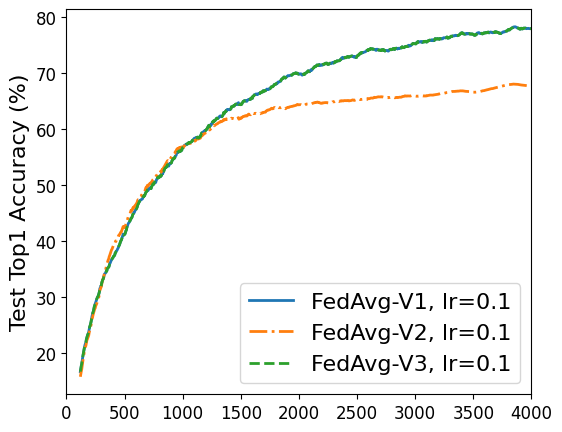

In [4]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys 
sys.path.append("/media/moon/Data/study/falcon/convergence/")

from sim.utils.record_utils import read_fromcsv
from plots.plot_utils import moving_average

# 'round' (0), 'train_loss'  (1), 'train_top1'  (2), 'train_top5'  (3), 
#              'train2_loss' (4), 'train2_top1' (5), 'train2_top5' (6), 
#              'test_loss'   (7), 'test_top1'   (8), 'test_top5'   (9)

def plotcurve(path, files, legend, setup):
    #ylabels = ['Round', 'Training Loss', 'Training Top1 Accuracy (%)', 'Training Top5 Accuracy (%)',  'Training-R Loss', 'Training-R Top1 Accuracy (%)', 'Training-R Top5 Accuracy (%)', 'Test Loss', 'Test Top1 Accuracy (%)', 'Test Top5 Accuracy (%)']
    #y_keys = ['round', 'train_loss', 'train_top1', 'train_top5', 'train2_loss', 'train2_top1', 'train2_top5', 'test_loss', 'test_top1', 'test_top5', ]
    ylabels = ['Round', 'Training Loss', 'Training Top1 Accuracy (%)', 'Training Top5 Accuracy (%)', 'Test Loss', 'Test Top1 Accuracy (%)', 'Test Top5 Accuracy (%)']
    y_keys = ['round', 'train_loss', 'train_top1', 'train_top5', 'test_loss', 'test_top1', 'test_top5', ]

    yi = setup['yi']
    ylabel = ylabels[yi[0]]
    # 4 figs per row, (6,5); 3 figs (6,4)
    plt.figure(figsize=(6, 5))

    for i in range(len(files)):
        files[i] = f'{files[i]}.csv' if '.csv' not in files[i] else files[i]
        if os.path.exists(os.path.join(path, files[i])):
            df = read_fromcsv(files[i], path)
            #step = df['round'].values[1] - df['round'].values[0]
            #df = df[df['round'].isin([v for v in range(0, setup['end']+1, step)])]
            if setup['end'] == 1000:
                select = 10
            elif setup['end'] == 4000:
                select = 25
            else:
                select = 1
            out = [df.iloc[:setup['end'], j].values[-select:] for j in yi]
            print('{:<4}:'.format(i), end=' ')
            for j in range(len(yi)):
               print('{:<5.2f}+{:<5.2f}'.format(out[j].mean(axis=0), out[j].std(axis=0)), end=' ')
            print('{}'.format(files[i]))

            x = df['round'].values
            y = [df[y_keys[j]].values for j in yi]

            if setup['smooth'] == 1:
                window_size = int(0.03*len(x))
                y_smooth = [moving_average(y[j], window_size) for j in range(len(yi))]
                x_smooth = x[len(x)-len(y_smooth[0]):]
                # back to the original variable
                x, y = x_smooth, y_smooth
            if 'V1' in files[i]:
                linestyle = '-'
            elif 'V2' in files[i]:
                linestyle = '-.'
            else:
                linestyle = '--'

            for j in range(len(yi)):
                plt.plot(x, y[j], color=None, lw=2, linestyle=linestyle, marker='', label=get_legend(files[i]))
        else:
            print('Not found {}'.format(files[i]))
    plt.xlim(xmin=0, xmax=setup['end'])
    #plt.ylim(ymin=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel(ylabel, fontsize=16)
    #plt.legend(loc=4, ncol=1, fontsize=15, bbox_to_anchor=(2, 0))
    plt.legend(loc=4, ncol=1, fontsize=16)
    #plt.grid()
    split_filename = files[0].split('_')
    

    filename = 'localdataset{}_{}_{}_{}_{}'.format(split_filename[0], split_filename[3], split_filename[5], split_filename[6], split_filename[7])
    print(filename)
    #plt.savefig('{}/{}.png'.format(path, filename), bbox_inches='tight', dpi=300)
    
    plt.show()

def get_legend(filename):
    if '.csv' in filename:
        filename = filename[:-4]
    split_t = filename.split('_')
    if re.sub(r'clip', '', split_t[-1]) != '0':
        clip = 'w/ clip={}'.format(re.sub(r'clip', '', split_t[-1]))
    else:
        clip = 'w/o clip'
    sgd = re.sub(r'sgd', '', split_t[8])
    sgd = sgd.split(',')
    lr = sgd[0]
    if split_t[0] == 'CWT':
        alg_name = 'SFL'
    elif split_t[0] == 'FedAvg':
        alg_name = 'PFL'
    else:
        alg_name = split_t[0]
    label = "{}, lr={}".format(alg_name,lr)
    return label

path = f'/media/moon/Data/study/falcon/convergence/tests/fedsets3/'

def main():
    global path
    files = [

'FedAvg-V1_M500_P10_K5_R4000_wvgg9k4_cifar10_exdir2,10.0_sgd0.1,1.0,0.0,0.0001_b20_seed1234_clip10.csv',
'FedAvg-V2_M500_P10_K5_R4000_wvgg9k4_cifar10_exdir2,10.0_sgd0.1,1.0,0.0,0.0001_b20_seed1234_clip10.csv',
'FedAvg-V3_M500_P10_K5_R4000_wvgg9k4_cifar10_exdir2,10.0_sgd0.1,1.0,0.0,0.0001_b20_seed1234_clip10.csv',

                 ]
    #plotcurve(path, files, legend=get_legend, setup={'end': 4000, 'select': 100, 'smooth': 1, 'yi': 8})
    plotcurve(path, files, legend=get_legend, setup={'end': 4000, 'select': 1, 'smooth': 1, 'yi': [5]})
    #plotcurve(path, files, legend=get_legend, setup={'end': 4000, 'select': 100, 'smooth': 1, 'yi': 5})



if __name__ == '__main__':
    main()